# 云上编程 EDA

In [191]:
! ls /cos_person/zhaopin/data

result.csv	    zhaopin_round1_submit_20190716.csv
table1_user	    zhaopin_round1_train_20190716
table2_jd	    zhaopin_round1_train_20190716.zip
table3_action	    zhaopin_round1_user_exposure_A_20190723
user_ToBePredicted  zhaopin_round1_user_exposure_B_20190819


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
# pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
path = "/cos_person/zhaopin/data/"

In [4]:
# 简历描述表
train_user = pd.read_csv(path+"table1_user", delimiter="\t")

test_user = pd.read_csv(path+"user_ToBePredicted",delimiter="\t")

train_job = pd.read_csv(path+"table2_jd", delimiter="\t", error_bad_lines=False)

train_action = pd.read_csv(path+"table3_action", delimiter="\t")

test_action = pd.read_csv(path+"zhaopin_round1_user_exposure_B_20190819", delim_whitespace=True)

b'Skipping line 173315: expected 18 fields, saw 20\n'


In [195]:
# 训练集人数
train_user["user_id"].nunique()

4500

In [196]:
# 测试集人数
test_user["user_id"].nunique()

500

In [197]:
# 测试集人数都不在训练集中
len(set(test_user["user_id"]) - set(train_user["user_id"]))

500

In [48]:
# 训练集职位数
train_job.jd_no.nunique()

265690

In [51]:
train_action.jd_no.nunique()

265825

In [53]:
# 在曝光的职位中不在职位表信息中数目
len(set(train_action["jd_no"]) - set(train_job["jd_no"]))

19533

In [54]:
# 测试机职位数
test_action.jd_no.nunique()

26008

In [55]:
# 在测试机曝光的职位中不在职位表信息中数目
len(set(test_action["jd_no"]) - set(train_job["jd_no"]))

2122

In [198]:
train_user.head().T

,0,1,2,3,4
user_id,17e1b9f107dd1214bd78dec6d91593a4,0c02d9411e83ae0308cdc40700385d4c,1f4504451a08e1e99e0b394e03f24b43,127b43572875dea9ed858da73a651433,15c607e1798305fb9f2e525d964a1185
live_city_id,551,763,530,871,530
desire_jd_city_id,"551,-,-","763,-,-","530,-,-","5085,-,-","530,-,-"
desire_jd_industry_id,房地产/建筑/建材/工程,其他,"专业服务/咨询(财会/法律/人力资源等),教育/培训/院校",房地产/建筑/建材/工程,"礼品/玩具/工艺美术/收藏品/奢侈品,教育/培训/院校,媒体/出版/影视/文化传播"
desire_jd_type_id,工程造价/预结算,化妆师,"项目经理/项目主管,教学/教务管理人员,翻译（口译与笔译）",行政/后勤/文秘,"艺术/设计,教育/培训"
desire_jd_salary_id,100002000,400106000,0,200104000,600108000
cur_industry_id,房地产/建筑/建材/工程,房地产/建筑/建材/工程,教育/培训/院校,旅游/度假,广告/会展/公关
cur_jd_type,土木/建筑/装修/市政工程,后期制作,项目管理/项目协调,行政/后勤/文秘,艺术/设计
cur_salary_id,0200104000,0400106000,1000115000,0200104000,0600108000
cur_degree_id,大专,大专,本科,大专,大专


## live_city_id 应聘者居住城市
### 应聘者更可能考虑工作地方在居住城市的工作

In [75]:
train_user["live_city_id"].nunique()

240

In [88]:
# def groupby_cnt_ratio(df, col):
#     if isinstance(col, str):
#         col = [col]
#     key = ['is_train', 'buyer_country_id'] + col
#     cnt_stat = df.groupby(key).size().to_frame('count')
#     ratio_stat = (cnt_stat / cnt_stat.groupby(['is_train', 'buyer_country_id']).transform(pd.Series.sum)).rename(columns={'count':'count_ratio'})
#     return pd.merge(cnt_stat.reset_index(), ratio_stat.reset_index(), on=key, how='outer').sort_values(by=['count'], ascending=False)

In [5]:
def groupby_cnt(df, col):
    """ 
        根据col统计
    """
    return df.groupby(col).size().to_frame('count').sort_values(by=['count'], ascending=False).reset_index()

def transpose(df,columns, groupby, col_name):
    """ 将多列转为多行 并根据 groupby 合并为新的一列， 列名为 col_name"""
    return df[groupby].join(df[columns].stack().reset_index(level=1, drop=True).rename(col_name))

Text(0.5, 1.0, 'live_city')

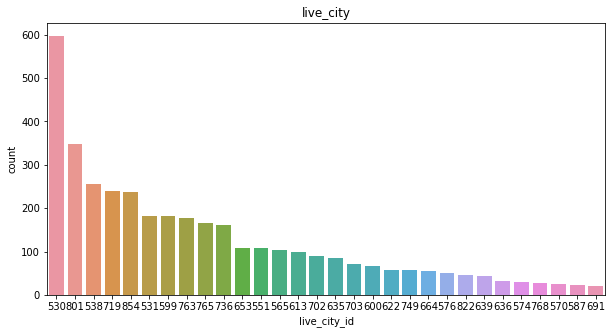

In [103]:
# 训练集中应聘者居住城市分布
temp = groupby_cnt(train_user,["live_city_id"]).head(30)
sns.barplot(x='live_city_id', y='count', data=temp, 
            order=temp['live_city_id'], estimator=np.mean).set_title('live_city')

Text(0.5, 1.0, 'live_city')

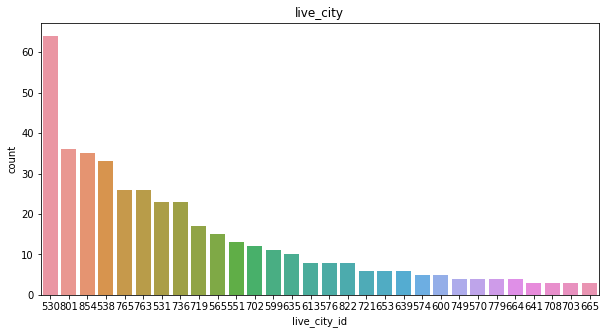

In [104]:
# 测试集中应聘者居住城市分布
temp = groupby_cnt(test_user,["live_city_id"]).head(30)
sns.barplot(x='live_city_id', y='count', data=temp, 
            order=temp['live_city_id'], estimator=np.mean).set_title('live_city')

## desire_jd_city_id 期望工作城市
### 有三个备选项
### 期望工作城市可以和当前工作城市做对比，另外三个工作备选项至少有两个相同，是否可以代表应聘者的工作意愿? 不可以。
### 如果当前工作城市跟期望工作城市不同，是否代表应聘者对该城市的态度？可以。
### 这里的城市应该包括省份，即有小类大类

In [200]:
temp = train_user['desire_jd_city_id'].str.split(',')
train_user['desire_jd_city_id_0'] = temp.apply(lambda x: x[0])
train_user['desire_jd_city_id_1'] = temp.apply(lambda x: x[1])
train_user['desire_jd_city_id_2'] = temp.apply(lambda x: x[2])

In [201]:
# train_user['desire_jd_city_id_2'].value_counts()
train_user[(train_user.desire_jd_city_id_0 != train_user.desire_jd_city_id_1) & (train_user.desire_jd_city_id_0 == train_user.desire_jd_city_id_2)][["desire_jd_city_id"]]

,desire_jd_city_id
4456,"719,530,719"


In [202]:
# 期望城市数  包括"-"
desire_jd_set = set(train_user.desire_jd_city_id_0) | set(train_user.desire_jd_city_id_1) | set(train_user.desire_jd_city_id_2)
len(desire_jd_set)

243

In [203]:
train_user[train_user['desire_jd_city_id'] == ""]

,user_id,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience,desire_jd_city_id_0,desire_jd_city_id_1,desire_jd_city_id_2


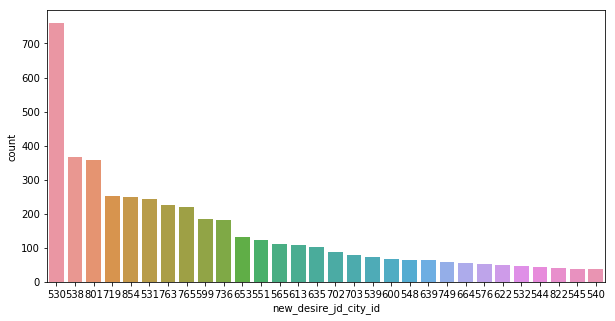

In [249]:
# 统计期望工作高的几个地方
temp = transpose(train_user,["desire_jd_city_id_0", "desire_jd_city_id_1", "desire_jd_city_id_2"], ["user_id"], "new_desire_jd_city_id")
temp.drop_duplicates(keep='first', inplace=True)
temp = groupby_cnt(temp[temp["new_desire_jd_city_id"] != "-"],["new_desire_jd_city_id"]).head(30)
sns.barplot(x='new_desire_jd_city_id', y='count', data=temp, 
            order=temp['new_desire_jd_city_id'], estimator=np.mean)

In [250]:
temp

,new_desire_jd_city_id,count
0,530,760
1,538,366
2,801,357
3,719,253
4,854,250
5,531,243
6,763,225
7,765,219
8,599,184
9,736,183


## desire_jd_industry_id 求职行业
### 最多有三个备选项， 相互独立
### 可以计算相似度，进行候选项打分？

In [125]:
# 求职行业统计
train_user.desire_jd_industry_id.unique(), train_user.desire_jd_industry_id.nunique()

(array(['房地产/建筑/建材/工程', '其他', '专业服务/咨询(财会/法律/人力资源等),教育/培训/院校', ...,
        '快速消费品（食品/饮料/烟酒/日化）,物流/仓储,房地产/建筑/建材/工程',
        '房地产/建筑/建材/工程,娱乐/体育/休闲,中介服务',
        '通信/电信运营、增值服务,教育/培训/院校,媒体/出版/影视/文化传播'], dtype=object), 1705)

In [168]:
train_user['desire_jd_industry_id'].isnull().sum()

0

In [208]:
train_user[train_user['desire_jd_industry_id'] == ""]

,user_id,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience,desire_jd_city_id_0,desire_jd_city_id_1,desire_jd_city_id_2,desire_jd_industry_id_0,desire_jd_industry_id_1,desire_jd_industry_id_2


In [207]:
temp = train_user['desire_jd_industry_id'].str.split(',')
train_user['desire_jd_industry_id_0'] = temp.apply(lambda x: x[0])
train_user['desire_jd_industry_id_1'] = temp.apply(lambda x: x[1] if len(x) > 1 else "-")
train_user['desire_jd_industry_id_2'] = temp.apply(lambda x: x[2] if len(x) > 2 else "-")

In [171]:
# 行业数 包括"-"
industry_id_set = set(train_user.desire_jd_industry_id_0) | set(train_user.desire_jd_industry_id_1) | set(train_user.desire_jd_industry_id_2)
len(industry_id_set)

57

In [233]:
# 哇塞，看这里发现了什么
train_user['desire_jd_industry_id'].str.split(',', expand=True).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,房地产/建筑/建材/工程,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,其他,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,专业服务/咨询(财会/法律/人力资源等),教育/培训/院校,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,房地产/建筑/建材/工程,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,礼品/玩具/工艺美术/收藏品/奢侈品,教育/培训/院校,媒体/出版/影视/文化传播,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


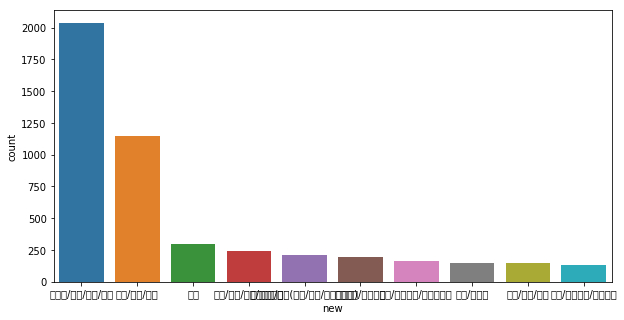

In [247]:
# 比较热门的几个求职行业
temp = transpose(train_user,["desire_jd_industry_id_0", "desire_jd_industry_id_0", "desire_jd_industry_id_2"], ["user_id"], "new")
temp.drop_duplicates(keep='first', inplace=True)
temp = groupby_cnt(temp[temp["new"] != "-"],["new"]).head(10)
sns.barplot(x='new', y='count', data=temp, 
            order=temp['new'], estimator=np.mean)
plt.show()

In [248]:
temp

,new,count
0,房地产/建筑/建材/工程,2037
1,教育/培训/院校,1151
2,其他,297
3,媒体/出版/影视/文化传播,244
4,专业服务/咨询(财会/法律/人力资源等),211
5,物业管理/商业中心,192
6,政府/公共事业/非盈利机构,161
7,贸易/进出口,150
8,广告/会展/公关,145
9,家居/室内设计/装饰装潢,136


## 求职职位 desire_jd_type_id
### 最多有三个备选项，其中有大类小类，父类子类，一般选定父类后，则子类选定不了
### 思路同求职行业，但还可以考虑聚类？

In [229]:
temp = train_user['desire_jd_type_id'].str.split(',')
train_user['desire_jd_type_id_0'] = temp.apply(lambda x: x[0])
train_user['desire_jd_type_id_1'] = temp.apply(lambda x: x[1] if len(x) > 1 else "-")
train_user['desire_jd_type_id_2'] = temp.apply(lambda x: x[2] if len(x) > 2 else "-")

In [173]:
# 职位数 包括"-"
jdtype_id_set = set(train_user.desire_jd_type_id_0) | set(train_user.desire_jd_industry_id_0) | set(train_user.desire_jd_industry_id_0)
len(jdtype_id_set)

457

In [234]:
# 哇塞，看这里发现了什么
train_user['desire_jd_type_id'].str.split(',', expand=True).head()

,0,1,2,3,4
0,工程造价/预结算,None,None,None,None
1,化妆师,None,None,None,None
2,项目经理/项目主管,教学/教务管理人员,翻译（口译与笔译）,None,None
3,行政/后勤/文秘,None,None,None,None
4,艺术/设计,教育/培训,None,None,None


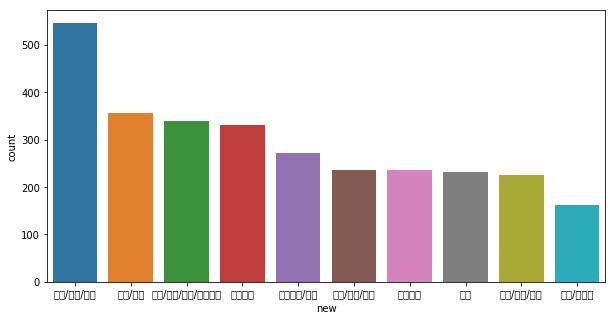

In [244]:
# 比较热门的几个求职行业
temp = transpose(train_user,["desire_jd_type_id_0", "desire_jd_type_id_1", "desire_jd_type_id_2"], ["user_id"], "new")
temp.drop_duplicates(keep='first', inplace=True)
temp = groupby_cnt(temp[temp["new"] != "-"],["new"]).head(10)
sns.barplot(x='new', y='count', data=temp, 
            order=temp['new'], estimator=np.mean)
plt.show()

In [245]:
temp

,new,count
0,行政/后勤/文秘,546
1,教育/培训,357
2,土木/建筑/装修/市政工程,339
3,人力资源,330
4,行政专员/助理,271
5,财务/审计/税务,236
6,销售业务,236
7,其他,231
8,助理/秘书/文员,226
9,会计/会计师,161


## desire_jd_salary_id 工资
### 这肯定是个强特征啊
### 可以做从小到大数值变量，面议的设为缺失值
### 工资同最高工资，最低工资加减可得到新的特征
### 不同行业不同职业的工资也有差别

In [251]:
temp = groupby_cnt(train_user,["desire_jd_salary_id"]).head(10)

In [252]:
temp

,desire_jd_salary_id,count
0,400106000,1392
1,600108000,870
2,0,592
3,800110000,440
4,200104000,430
5,1000115000,408
6,1500125000,244
7,2500199999,63
8,3500150000,24
9,70001100000,9


## cur_industry_id 当前行业

In [254]:
temp = groupby_cnt(train_user,["cur_industry_id"]).head(30)
temp

,cur_industry_id,count
0,房地产/建筑/建材/工程,1764
1,教育/培训/院校,869
2,家居/室内设计/装饰装潢,126
3,酒店/餐饮,97
4,物业管理/商业中心,93
5,专业服务/咨询(财会/法律/人力资源等),89
6,零售/批发,86
7,快速消费品（食品/饮料/烟酒/日化）,77
8,房地产|建筑业,74
9,汽车/摩托车,71


In [259]:
# 缺失值
train_user["cur_industry_id"].isnull().sum()

36

## cur_jd_type 当前职位

In [260]:
temp = groupby_cnt(train_user,["cur_jd_type"]).head(30)
temp

,cur_jd_type,count
0,土木/建筑/装修/市政工程,437
1,财务/审计/税务,270
2,行政/后勤/文秘,225
3,教育/培训,199
4,人力资源,172
5,项目管理/项目协调,133
6,销售业务,130
7,销售管理,127
8,房地产开发/经纪/中介,114
9,高级管理,80


In [261]:
# 缺失值
train_user["cur_jd_type"].isnull().sum()

1706

## cur_salary_id 工资水平

In [263]:
# 缺失值
train_user["cur_salary_id"].isnull().sum()

0

In [267]:
train_user[train_user["cur_salary_id"]=="-"].shape # "-" 代表缺失 0 代表不公开

(31, 22)

In [264]:
temp = groupby_cnt(train_user,["cur_salary_id"]).head(30)
temp

,cur_salary_id,count
0,0400106000,1316
1,0200104000,1040
2,0600108000,755
3,1000115000,439
4,0800110000,413
5,1500125000,234
6,0000001000,72
7,2500199999,67
8,0100002000,63
9,3500150000,33


## cur_degree_id 学历

In [270]:
# 缺失值
train_user["cur_degree_id"].isnull().sum()

179

In [269]:
temp = groupby_cnt(train_user,["cur_degree_id"]).head(30)
temp

,cur_degree_id,count
0,本科,2254
1,大专,1672
2,硕士,138
3,高中,106
4,中专,99
5,MBA,16
6,其他,12
7,中技,11
8,EMBA,6
9,初中,6


## birthday 年龄

In [272]:
temp = groupby_cnt(train_user,["birthday"])
temp

,birthday,count
0,24,1327
1,27,907
2,30,661
3,21,565
4,33,420
5,36,265
6,39,137
7,42,62
8,45,47
9,48,39


Text(0.5, 1.0, 'live_city')

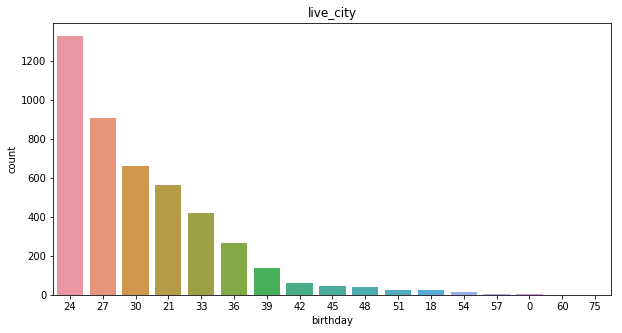

In [277]:
sns.barplot(x='birthday', y='count', data=temp, 
            order=temp['birthday'], estimator=np.mean).set_title('live_city')

In [275]:
train_user["birthday"].isnull().sum()

0

In [276]:
train_user[train_user["birthday"]==0]

,user_id,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience,desire_jd_city_id_0,desire_jd_city_id_1,desire_jd_city_id_2,desire_jd_industry_id_0,desire_jd_industry_id_1,desire_jd_industry_id_2,desire_jd_type_id_0,desire_jd_type_id_1,desire_jd_type_id_2
1629,18eb25cfaf2337a062451d4c62d93ecd,530,"530,499,801",房地产/建筑/建材/工程,房地产开发/经纪/中介,600108000,房地产/建筑/建材/工程,房地产开发/经纪/中介,0400106000,大专,0,2015,安排|出入境|度假|旅行|客户经理|合伙人|订房|行程|车辆|策划|采购|私人|导游|旅行社...,530,499,801,房地产/建筑/建材/工程,-,-,房地产开发/经纪/中介,-,-
3673,1467fb5c6dbc5633c441ebc3c24f043e,886,"886,-,-",房地产/建筑/建材/工程,"施工员,施工队长,建筑施工现场管理",600108000,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0600108000,本科,0,-,施工管理|现场|施工|标准化|业主|建设|测量|工程测量|放线|管理工作|数据|安全|记录|...,886,-,-,房地产/建筑/建材/工程,-,-,施工员,施工队长,建筑施工现场管理


## start_work_date 开始工作时期
### 工作年龄可作为特征， 将工作年龄跟实际年龄做对比，将工作年龄跟职位期望工作年限做对比

In [278]:
temp = groupby_cnt(train_user,["start_work_date"])
temp

,start_work_date,count
0,2017,554
1,2016,506
2,2015,473
3,2014,339
4,2018,316
5,2013,296
6,2012,258
7,2011,248
8,2010,213
9,2009,182


## experience 经验? 一堆乱文
### 后续考虑清洗

In [279]:
train_user["experience"]

0       停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
1                                   调色员|彩妆|护肤|布料|光源|客户|调色
2       互联网参考模型osi七层|建设|英语|项目主管|签证|谈判|合同|crm系统|pl/sql|...
3                                    行政|酒店|后勤|温泉|文员|文秘|旅游
4       上色|产品开发|插画|纸张|老师|制作|3dmax|美术|视觉设计|视觉|vi|道具|设计师...
5       计划|预算|外国语言文学|公司财务|预定|入库|对账|橱柜|分销商|系统|业务|保证|售后服...
6       催收|预算|银行|报税|做账|财务软件|处理|预算软件|会计工作|金蝶财务|办公室|说明书|...
7       园林|互联网参考模型osi七层|文件|风险|处理|风控|接待|清洁|自我评价|投诉|设备|收...
8        外科|自我评价|人力资源专员|助理|人力资源管理|吃苦|行政助理|汽修|人力资源|汽车检测与维修
9                                              担当|行政专员|助理
10      计划|互联网参考模型osi七层|中餐烹饪|管理制度|礼品|office|组织|生产计划|微信...
11      资料|核销|电话|前台|熟练|管理|接待|商务|数据分析|后勤部|酒店|办公室|人事|收集|...
12      领导|施工|资料|建设|引导|业务|发展|完善|市场|推销|大学|销售代表|办公室|技术员|资料员
13      预算|注册会计师|做账|预算编制|财务报表|财务软件|office|预算软件|成本|档案整理...
14      招标|互联网参考模型osi七层|外国语言文学|综合|二级建造师证书|bim|计算|预算编制|...
15      商务礼仪|记者|房产|客户资源|吃苦|货物运输|自主创业|运输|调查|大学|创业|自我评价|...
16      外国语言文学|文件|投资|资料|质量部|员工|实习|管理|英语|考勤|合同|保证|租房|组织...
17      园林|结构工

# job 岗位描述表

In [282]:
# 只有关键字 跟 语言需求有缺失， 这里的缺失只是表示没有
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265690 entries, 0 to 265689
Data columns (total 18 columns):
jd_no                       265690 non-null object
jd_title                    265690 non-null object
company_name                265690 non-null object
city                        265690 non-null int64
jd_sub_type                 265690 non-null object
require_nums                265690 non-null int64
max_salary                  265690 non-null int64
min_salary                  265690 non-null int64
start_date                  265690 non-null object
end_date                    265690 non-null object
is_travel                   265690 non-null int64
min_years                   265690 non-null int64
key                         3056 non-null object
min_edu_level               265690 non-null object
max_edu_level               265690 non-null object
is_mangerial                265690 non-null object
resume_language_required    4961 non-null object
job_description             2656

In [293]:
# train_job.drop_duplicates(subset=['jd_no'],keep='first', inplace=False)

In [287]:
# 公司名可以删除
train_job["company_name"].value_counts()

-    265690
Name: company_name, dtype: int64

## city 工作城市

In [290]:
train_job["city"].nunique()

393

In [294]:
temp = groupby_cnt(train_job,["city"]).head(10)
temp

,city,count
0,530,37013
1,801,16632
2,719,15999
3,538,15663
4,765,13777
5,854,13715
6,763,11537
7,599,9366
8,531,9025
9,736,8917


## jd_sub_type 职位子类

In [296]:
train_job["jd_sub_type"].head(10)

0        园林/景观设计
1       工程造价/预结算
2           汽车销售
3        网络/在线客服
4       工程造价/预结算
5       工程造价/预结算
6      人力资源专员/助理
7       助理/秘书/文员
8             \N
9    电脑操作/打字/录入员
Name: jd_sub_type, dtype: object

In [297]:
temp = groupby_cnt(train_job,["jd_sub_type"]).head(10)
temp

,jd_sub_type,count
0,\N,35674
1,会计/会计师,10562
2,行政专员/助理,10482
3,助理/秘书/文员,8920
4,工程造价/预结算,8312
5,人力资源专员/助理,7691
6,其他,7230
7,出纳员,5296
8,行政经理/主管/办公室主任,4402
9,前台/总机/接待,3808


## require_nums 需求人数
### 需求人数统计可做一个特征
### 为什么有不少职位需求人数很多？ 存不存在造假？

Text(0.5, 1.0, 'live_city')

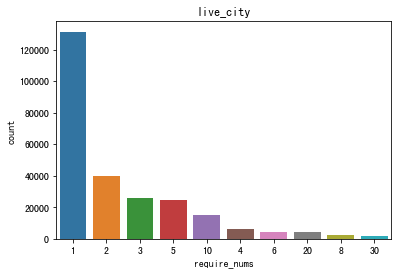

In [11]:
temp = groupby_cnt(train_job,["require_nums"]).head(10)
sns.barplot(x='require_nums', y='count', data=temp, 
            order=temp['require_nums'], estimator=np.mean).set_title('live_city')

In [303]:
temp.head(30)

,require_nums,count
0,1,131256
1,2,40038
2,3,26252
3,5,24361
4,10,15324
5,4,6179
6,6,4521
7,20,4378
8,8,2433
9,30,1958


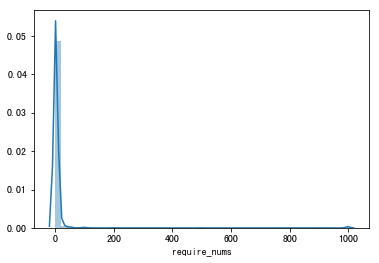

In [7]:
# 密度图
sns.distplot(train_job['require_nums'])

In [310]:
train_job[train_job['require_nums'] == 0]

,jd_no,jd_title,company_name,city,jd_sub_type,require_nums,max_salary,min_salary,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description


## max_salary 最高月薪
### 可以重新分组

Text(0.5, 1.0, 'live_city')

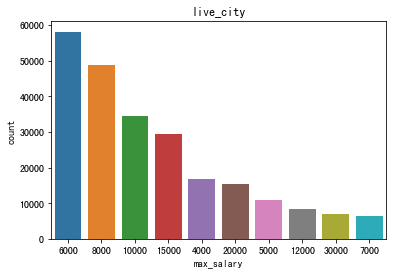

In [13]:
temp = groupby_cnt(train_job,["max_salary"]).head(10)
sns.barplot(x='max_salary', y='count', data=temp, 
            order=temp['max_salary'], estimator=np.mean).set_title('live_city')

In [19]:
train_job[train_job["max_salary"] == 0].head()

,jd_no,jd_title,company_name,city,jd_sub_type,require_nums,max_salary,min_salary,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
495,4f30527797388e20ab245d12a3eff88b,阿里巴巴-人才招聘会-厦门专场,-,682,其他,1,0,0,20181113,20190703,0,103,NaN,本科,\N,\N,NaN,【高级客户经理】岗位职责：1、负责本地化B2B市场客户开发和本地化服务体系落地；提升客户忠诚...
3060,84ce732af8b9258543c603465b0e500e,银泰商业杭州临平店-营运助理,-,653,其他,1,0,0,20190228,20190703,0,1,NaN,本科,\N,\N,NaN,1、在门店营业部统一管理下，执行营运规范管理工作和商品规范管理工作，严格执行公司相关制度流程...
4629,0b30d5ad4af8e2aab63006f9445a2184,20772-企鹅影视经纪人,-,530,其他,1,0,0,20190306,20190405,0,0,NaN,\N,\N,\N,NaN,工作职责：处理签约艺人和代理艺人的演艺经纪事务，推进并完成艺人的演艺项目合同，以及账务结算；...
8875,cd4fb5df314d645237e7f0e5cc6e0596,国际事业部-中国供应商-资深客户经理,-,653,其他,1,0,0,20190125,20190703,0,305,NaN,本科,\N,\N,NaN,1、了解公司战略方向，结合本地化市场，负责所在区域客户的开发、拓展和运营；2、评估诊断客户业...
12043,8df1d211f5426e3adf953258a8d4dfe4,盒马-库控专员-重庆,-,551,其他,1,0,0,20181129,20190703,0,103,NaN,本科,\N,\N,NaN,盒马，新零售业态的新生力量，依靠科技重构餐饮及零售产业链。从创立伊始，盒马的使命就是让消费者...


## min_salary 最低月薪

Text(0.5, 1.0, 'live_city')

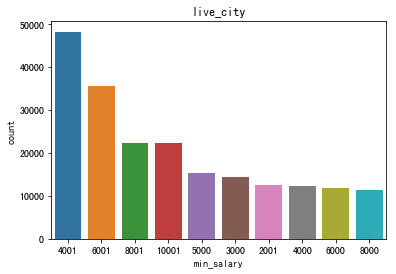

In [20]:
temp = groupby_cnt(train_job,["min_salary"]).head(10)
sns.barplot(x='min_salary', y='count', data=temp, 
            order=temp['min_salary'], estimator=np.mean).set_title('live_city')

In [27]:
# 这种一律干掉????
train_job[(train_job["min_salary"] == 0) & (train_job["max_salary"] <= 1000)].head()

,jd_no,jd_title,company_name,city,jd_sub_type,require_nums,max_salary,min_salary,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
495,4f30527797388e20ab245d12a3eff88b,阿里巴巴-人才招聘会-厦门专场,-,682,其他,1,0,0,20181113,20190703,0,103,NaN,本科,\N,\N,NaN,【高级客户经理】岗位职责：1、负责本地化B2B市场客户开发和本地化服务体系落地；提升客户忠诚...
2988,e8093bf0dc120b45a2f595f022b81821,策划经理,-,719,市场策划/企划经理/主管,1,1000,0,20190312,20190421,1,510,NaN,本科,\N,\N,NaN,任职要求：1.熟悉项目开发前期的市场调研工作流程，能够有序的组织市场调研工作，能够独立完成市...
3060,84ce732af8b9258543c603465b0e500e,银泰商业杭州临平店-营运助理,-,653,其他,1,0,0,20190228,20190703,0,1,NaN,本科,\N,\N,NaN,1、在门店营业部统一管理下，执行营运规范管理工作和商品规范管理工作，严格执行公司相关制度流程...
4002,bba3d8910fd0270440fb6ea8e1346499,土建工程师,-,551,\N,1,1000,0,20190218,20190320,1,510,NaN,大专,\N,\N,NaN,职位名称：土建工程师 2人(1)对项目经理负责，负责本专业的日常工程管理工作。(2)负责本专...
4629,0b30d5ad4af8e2aab63006f9445a2184,20772-企鹅影视经纪人,-,530,其他,1,0,0,20190306,20190405,0,0,NaN,\N,\N,\N,NaN,工作职责：处理签约艺人和代理艺人的演艺经纪事务，推进并完成艺人的演艺项目合同，以及账务结算；...


## start_date 招人开始时间
### 这个也是个强特征

Text(0.5, 1.0, 'live_city')

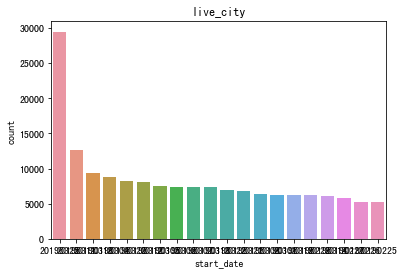

In [29]:
temp = groupby_cnt(train_job,["start_date"]).head(20)
sns.barplot(x='start_date', y='count', data=temp, 
            order=temp['start_date'], estimator=np.mean).set_title('live_city')

In [30]:
temp

,start_date,count
0,20190325,29457
1,20190311,12646
2,20190318,9349
3,20190304,8764
4,20190320,8281
5,20190312,8167
6,20190305,7598
7,20190306,7432
8,20190307,7372
9,20190313,7352


In [35]:
train_job[train_job["start_date"]==r"\N"].head()

,jd_no,jd_title,company_name,city,jd_sub_type,require_nums,max_salary,min_salary,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
5266,2a26cbf8d2c03b262b3ffecee85a248c,车务人员,-,801,汽车销售,3,8000,6001,\N,\N,1,305,NaN,大专,\N,\N,NaN,\N
12121,521ace0e473d14dbbab1977d18f91f82,综合办文员,-,831,行政专员/助理,5,6000,4001,\N,\N,1,-1,NaN,本科,\N,\N,NaN,\N
12709,902c5107e73eeef311d998f610c41a39,现场售后工程师,-,622,售前/售后技术支持工程师,3,6000,4001,\N,\N,1,-1,NaN,大专,\N,\N,NaN,整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合整合
12718,7249a7f63cf44fcd748bb67bcc0d8208,招聘经理/高级主管/主管,-,691,招聘经理/主管,1,20000,15001,\N,\N,1,510,NaN,本科,\N,\N,NaN,岗位职责： 1.根据本区域招聘需求和规范流程，拟定招聘计划、组织招聘活动、完成招聘目标；2....
19796,096e8162bf722dc5995212a08585bea2,银行面签岗,-,719,风险控制,1,6000,4001,\N,\N,1,0,NaN,本科,\N,\N,NaN,\N


## end_date 招人结束日期
### 有些时间为数字，有些时间为str，需要处理
### 结束时间可跟招聘者的工作开始时间做对比

In [37]:
train_job["end_date"].unique()

array(['20190524', '20190412', '20190410', '20191217', '20190417',
       '20190421', '20190303', '20191123', '20190418', '20190424',
       '20190420', '20190419', '20190404', '20190411', '20190405',
       '20191110', '20190407', '20190329', '20190315', '20190403',
       '20190912', '20190317', '20190324', '20190314', '20190322',
       '20190907', '20190416', '20190413', '20190508', '20190505',
       '20190713', '20190327', '20190321', '20190529', '20190415',
       '20190330', '20190414', '20190313', '20190331', '20190406',
       '20190502', '20190328', '20190302', '20190627', '20190409',
       '20190607', '20190408', '20190402', '20190504', '20190320',
       '20190616', '20191008', '20190422', '20190319', '20190427',
       '20190513', '20200102', '20200109', '20191018', '20190706',
       '20190622', '20190711', '20190808', '20190510', '20191108',
       '20191109', '20190503', '20190423', '20190704', '20190703',
       '20190805', '20190316', '20190515', '20190430', '201909

## is_travel 是否需要出差

In [41]:
train_job["is_travel"].value_counts(dropna=False)

0    166782
1     97640
2      1268
Name: is_travel, dtype: int64

## min_years 最低工作年限 103:一年到三年，305:三年到五年，510:五年到十年，1099:十年以上

In [42]:
train_job["min_years"].value_counts(dropna=False)

-1       93693
 103     75527
 305     50505
 510     29845
 1099     5498
 1        5430
 0        5161
 399        26
 599         2
 199         1
 110         1
 299         1
Name: min_years, dtype: int64

## key 关键字

In [44]:
train_job["key"].value_counts(dropna=False)

NaN                                             262634
销售|销售代表|客户经理                                        10
销售|销售代表|销售业务                                        10
销售|销售代表|大客户销售                                        9
会计                                                   8
销售|销售代表|业务                                           7
财务|会计|出纳                                             7
销售|业务|市场                                             7
销售|销售代表|业务员                                          7
课程顾问|销售|招生                                           5
销售|业务|销售代表                                           5
销售|客户经理|业务                                           4
培训|公职|讲师                                             4
销售|销售代表|销售顾问                                         4
销售|面销|课程顾问                                           4
销售                                                   4
课程顾问|销售|咨询顾问                                         4
销售|高端销售|销售顾问                                         4
销售|销售代表|课程

## min_edu_level 学历要求

In [45]:
train_job["min_edu_level"].value_counts(dropna=False)

大专     128135
本科      83313
\N      38126
中专      11938
硕士       1503
中技       1404
高中       1259
博士         10
初中          1
请选择         1
Name: min_edu_level, dtype: int64

In [47]:
train_job [train_job["min_edu_level"] == "请选择"]

,jd_no,jd_title,company_name,city,jd_sub_type,require_nums,max_salary,min_salary,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
25313,e62539f7e24ae83c82de88001ddf30a3,双休包住办公室文员,-,719,\N,10,5000,3000,20190320,20190419,0,0,NaN,请选择,\N,\N,NaN,岗位职责：1、负责各种文件材料的打印、规整和分类；2、客户档案的整理和归档；3、负责转接电话...


## max_edu_level 最高学历要求 删除

In [49]:
train_job["max_edu_level"].value_counts(dropna=False)

\N    265690
Name: max_edu_level, dtype: int64

## is_mangerial 是否要求管理经验 删除

In [51]:
train_job["is_mangerial"].value_counts(dropna=False)

\N    265690
Name: is_mangerial, dtype: int64

In [53]:
train_job["resume_language_required"].value_counts(dropna=False) # 删除

NaN    260729
\N       4961
Name: resume_language_required, dtype: int64

## job_description 职位描述？？？后面考虑怎么用

In [222]:
! cp /cos_person/simhei.ttf /usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/

In [223]:
! rm -rf  /root/.cache/matplotlib/* 